In [74]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("pf_suvs_i302_1s2025.csv")

# Eliminar columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

#redondear las columnas num√©ricas 
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].round(2)
# Mostrar las nuevas columnas

# Limpiar 'Kil√≥metros': quitar ' km', puntos y convertir a float
df['Kil√≥metros'] = df['Kil√≥metros'].astype(str).str.replace('.', '', regex=False)
df['Kil√≥metros'] = df['Kil√≥metros'].str.replace(' km', '', regex=False)
df['Kil√≥metros'] = pd.to_numeric(df['Kil√≥metros'], errors='coerce')
df.head()

Marca           Modelo     A√±o                      Versi√≥n   Color  \
0        Ford         Ecosport  2020.0      1.5 Freestyle 123cv 4x2  Blanco   
1  Volkswagen           Tiguan  2024.0              LIFE 350 TSI 4M   Negro   
2  Volkswagen  Tiguan Allspace  2019.0  1.4 Tsi Trendline 150cv Dsg   Negro   
3        Ford         Ecosport  2017.0       1.5 Titanium 123Cv 4X2  Blanco   
4        Jeep          Compass  2021.0                 2.4 Sport At     NaN   

  Tipo de combustible  Puertas            Transmisi√≥n                  Motor  \
0               Nafta      5.0                 Manual                    1.5   
1               Nafta      5.0  Autom√°tica secuencial  2.0 L 230 CV  350 TSI   
2               Nafta      5.0             Autom√°tica                    1.4   
3               Nafta      5.0                 Manual                    1.5   
4               Nafta      5.0             Autom√°tica                    2.4   

  Tipo de carrocer√≠a Con c√°mara de retroceso  Kil√≥metros  \
0                SUV                      No      640000   
1                SUV                      S√≠           0   
2                SUV                     NaN      653000   
3                SUV                     NaN      768980   
4                SUV                     NaN     1090000   

                                              T√≠tulo      Precio Moneda  \
0              Ford Ecosport 1.5 Freestyle 123cv 4x2  20500000.0      $   
1                         Tiguan Life 350 Tsi 4m  Ar  55999900.0      $   
2  Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...     28300.0    US$   
3               Ford Ecosport 1.5 Titanium 123Cv 4X2  20090000.0      $   
4                          Jeep Compass 2.4 Sport At     23000.0    US$   

                                         Descripci√≥n Tipo de vendedor  
0  Descubre nuestro impresionante Ford Eco Sport ...    concesionaria  
1  AUTOTAG S.A. Concesionario Oficial N¬∞1 Volkswa...           tienda  
2  -HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...       particular  
3  En GRUPO RANDAZZO, tenemos el auto que estas b...           tienda  
4  ‚Ä¢Unico due√±o‚Ä¢Todos los services oficiales‚Ä¢Bate...       particular

In [75]:
# Primero normalizamos los valores de moneda
df['Moneda'] = df['Moneda'].replace({'$': 'peso', 'U$S': 'dolar'})

# Tasa de conversi√≥n
PESO_A_DOLAR = 1165

# Crear nueva columna con el precio en d√≥lares
df['Precio_usd'] = df.apply(
    lambda row: row['Precio'] / PESO_A_DOLAR if row['Moneda'] == 'peso' else row['Precio'],
    axis=1
)

# (Opcional) Eliminar columnas viejas si ya no las quer√©s
# df = df.drop(columns=['Precio', 'Moneda'])

# Mostrar las primeras filas para verificar
df.head()

Marca           Modelo     A√±o                      Versi√≥n   Color  \
0        Ford         Ecosport  2020.0      1.5 Freestyle 123cv 4x2  Blanco   
1  Volkswagen           Tiguan  2024.0              LIFE 350 TSI 4M   Negro   
2  Volkswagen  Tiguan Allspace  2019.0  1.4 Tsi Trendline 150cv Dsg   Negro   
3        Ford         Ecosport  2017.0       1.5 Titanium 123Cv 4X2  Blanco   
4        Jeep          Compass  2021.0                 2.4 Sport At     NaN   

  Tipo de combustible  Puertas            Transmisi√≥n                  Motor  \
0               Nafta      5.0                 Manual                    1.5   
1               Nafta      5.0  Autom√°tica secuencial  2.0 L 230 CV  350 TSI   
2               Nafta      5.0             Autom√°tica                    1.4   
3               Nafta      5.0                 Manual                    1.5   
4               Nafta      5.0             Autom√°tica                    2.4   

  Tipo de carrocer√≠a Con c√°mara de retroceso  Kil√≥metros  \
0                SUV                      No      640000   
1                SUV                      S√≠           0   
2                SUV                     NaN      653000   
3                SUV                     NaN      768980   
4                SUV                     NaN     1090000   

                                              T√≠tulo      Precio Moneda  \
0              Ford Ecosport 1.5 Freestyle 123cv 4x2  20500000.0   peso   
1                         Tiguan Life 350 Tsi 4m  Ar  55999900.0   peso   
2  Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...     28300.0    US$   
3               Ford Ecosport 1.5 Titanium 123Cv 4X2  20090000.0   peso   
4                          Jeep Compass 2.4 Sport At     23000.0    US$   

                                         Descripci√≥n Tipo de vendedor  \
0  Descubre nuestro impresionante Ford Eco Sport ...    concesionaria   
1  AUTOTAG S.A. Concesionario Oficial N¬∞1 Volkswa...           tienda   
2  -HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...       particular   
3  En GRUPO RANDAZZO, tenemos el auto que estas b...           tienda   
4  ‚Ä¢Unico due√±o‚Ä¢Todos los services oficiales‚Ä¢Bate...       particular   

     Precio_usd  
0  17596.566524  
1  48068.583691  
2  28300.000000  
3  17244.635193  
4  23000.000000

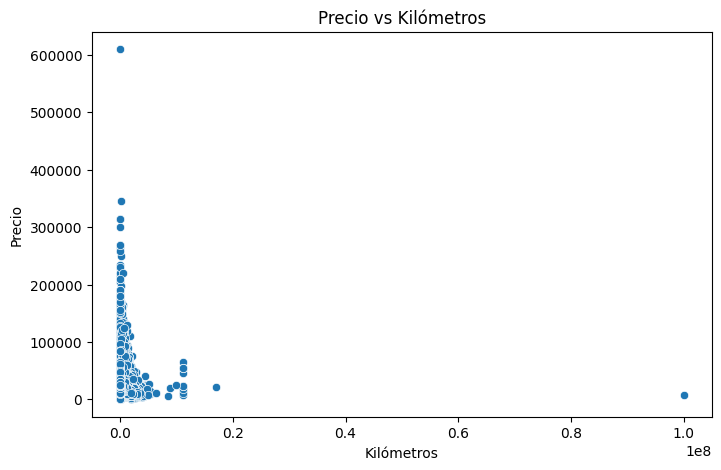

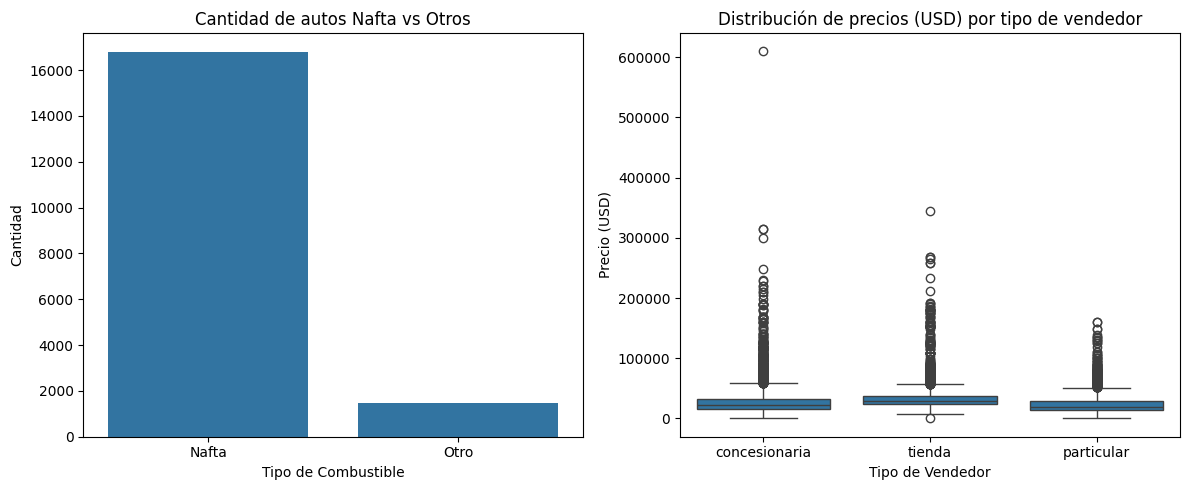

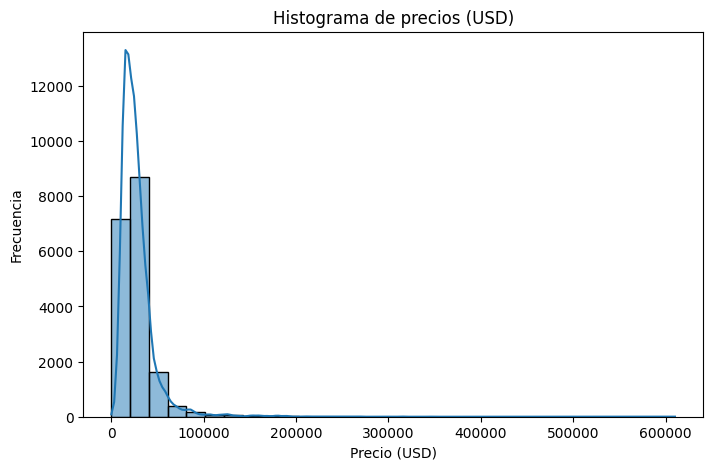

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- GRAFICO 1: Scatter Precio vs Kil√≥metros ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Kil√≥metros', y='Precio_usd')
plt.title('Precio vs Kil√≥metros')
plt.xlabel('Kil√≥metros')
plt.ylabel('Precio')
plt.show()

# --- GRAFICO 2: Boxplot Nafta (incluye H√≠brido/Nafta) vs Otros ---

# Crear columna binaria para nafta
df['Combustible_nafta'] = df['Tipo de combustible'].apply(
    lambda x: 'Nafta' if 'nafta' in str(x).lower() else 'Otro'
)

# --- GRAFICOS: Cantidad por tipo de combustible + Boxplot por tipo de vendedor ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gr√°fico 1: Countplot Nafta vs Otros
sns.countplot(data=df, x='Combustible_nafta', ax=axes[0])
axes[0].set_title('Cantidad de autos Nafta vs Otros')
axes[0].set_xlabel('Tipo de Combustible')
axes[0].set_ylabel('Cantidad')

# Gr√°fico 2: Boxplot Precio_usd por Tipo de vendedor
sns.boxplot(data=df, x='Tipo de vendedor', y='Precio_usd', ax=axes[1])
axes[1].set_title('Distribuci√≥n de precios (USD) por tipo de vendedor')
axes[1].set_xlabel('Tipo de Vendedor')
axes[1].set_ylabel('Precio (USD)')

plt.tight_layout()
plt.show()
# --- GRAFICO 3: Histograma de precios ---
plt.figure(figsize=(8, 5))
sns.histplot(df['Precio_usd'], bins=30, kde=True)
plt.title('Histograma de precios (USD)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()

In [77]:
#maximo precio en dolares y su marca
max_precio_usd = df['Precio_usd'].max()
marca_max_precio = df.loc[df['Precio_usd'] == max_precio_usd, 'Marca'].values[0]
print(f"La marca del auto con el precio m√°ximo es: {marca_max_precio}")
# Precio promedio en d√≥lares
precio_promedio_usd = df['Precio_usd'].mean()
print(f"El precio promedio en d√≥lares es: {precio_promedio_usd:.2f} USD")
# Precio m√≠nimo en d√≥lares y su marca
min_precio_usd = df['Precio_usd'].min()
marca_min_precio = df.loc[df['Precio_usd'] == min_precio_usd, 'Marca'].values[0]
print(f"El precio m√≠nimo en d√≥lares es: {min_precio_usd:.2f} USD, marca: {marca_min_precio}")

La marca del auto con el precio m√°ximo es: Land Rover
El precio promedio en d√≥lares es: 27852.26 USD
El precio m√≠nimo en d√≥lares es: 102.15 USD, marca: Jeep


In [78]:
def buscar_precio_usd(df, datos_auto):
    """
    Busca autos que coincidan con los campos provistos en datos_auto y devuelve sus precios en d√≥lares.
    Si no encuentra coincidencias, devuelve un mensaje.
    """
    filtro = df.copy()
    for clave, valor in datos_auto.items():
        if clave not in df.columns:
            return f"Columna '{clave}' no encontrada en el dataset"
        filtro = filtro[filtro[clave] == valor]
    
    if not filtro.empty:
        return filtro['Precio_usd'].values.tolist()
    else:
        return "Auto no encontrado en el dataset"
auto = {
    'Marca': 'Ford',
    'Kil√≥metros': 0.0  # fijate si esto funciona
}
precio_encontrado = buscar_precio_usd(df, auto)
print(f"Precio encontrado: {precio_encontrado}")


Precio encontrado: [51330.47210300429, 41936.48068669528, 51416.309012875536, 39484.978540772536, 39957.08154506438, 39914.16309012876, 42575.107296137336, 53648.0686695279, 40280.896137339056, 40171.673819742486, 36200.0, 41974.24892703863, 48755.36480686695, 40000.858369098714, 42575.107296137336, 42446.35193133047, 44635.19313304721, 35828.58369098712, 40001.71673819742, 34037.15450643777, 50643.776824034336, 40000.0, 40042.91845493562, 51000.0, 41974.24892703863, 39957.08154506438, 42832.61802575107, 45064.377682403436, 37000.0, 54500.0, 42852.01716738197, 42575.107296137336, 41974.24892703863, 51158.7982832618, 46781.11587982833, 42852.01716738197, 39227.4678111588, 41630.90128755365, 39484.978540772536, 40085.83690987124, 42575.107296137336, 41201.71673819742, 35879.82832618026, 51158.7982832618, 39957.08927038626, 39484.978540772536, 39484.978540772536, 46000.0, 40900.0, 47707.124463519314, 57900.0, 40000.0, 47964.80686695279, 41630.90128755365, 41193.1330472103, 39957.081545064

Primeras filas del dataset:
   Unnamed: 0       Marca           Modelo     A√±o  \
0           0        Ford         Ecosport  2020.0   
1           1  Volkswagen           Tiguan  2024.0   
2           2  Volkswagen  Tiguan Allspace  2019.0   
3           3        Ford         Ecosport  2017.0   
4           4        Jeep          Compass  2021.0   

                       Versi√≥n   Color Tipo de combustible  Puertas  \
0      1.5 Freestyle 123cv 4x2  Blanco               Nafta      5.0   
1              LIFE 350 TSI 4M   Negro               Nafta      5.0   
2  1.4 Tsi Trendline 150cv Dsg   Negro               Nafta      5.0   
3       1.5 Titanium 123Cv 4X2  Blanco               Nafta      5.0   
4                 2.4 Sport At     NaN               Nafta      5.0   

             Transmisi√≥n                  Motor Tipo de carrocer√≠a  \
0                 Manual                    1.5                SUV   
1  Autom√°tica secuencial  2.0 L 230 CV  350 TSI                SUV   
2    

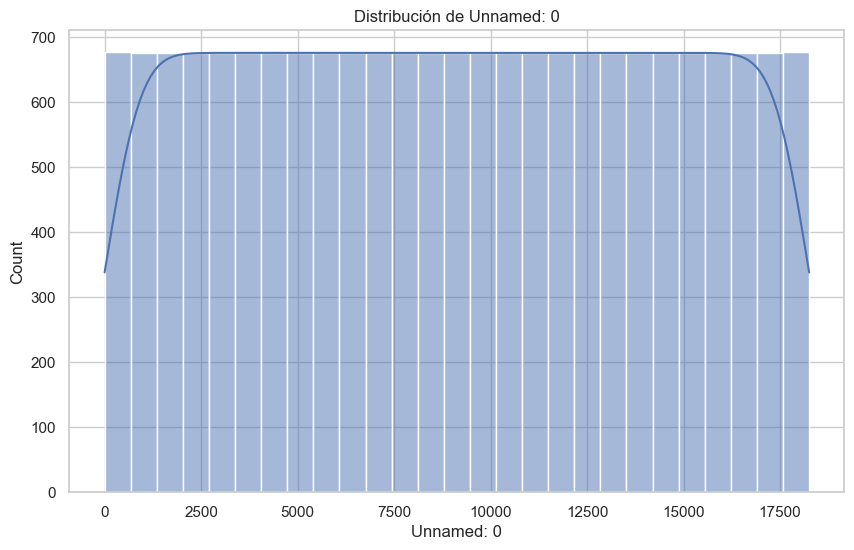

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001DD4DF787C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [1]:
# --- Importar librer√≠as ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuraciones de visualizaci√≥n ---
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# --- Cargar el dataset ---
df = pd.read_csv("dataset.csv")

# --- Vista general de los datos ---
print("Primeras filas del dataset:")
print(df.head())

print("\nInformaci√≥n general:")
print(df.info())

print("\nEstad√≠sticas descriptivas:")
print(df.describe(include='all'))

# --- Valores faltantes ---
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# --- Variables categ√≥ricas: valores √∫nicos ---
print("\nValores √∫nicos por columna categ√≥rica:")
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].nunique()} valores √∫nicos")

# --- Distribuci√≥n de variables num√©ricas ---
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribuci√≥n de {col}')
    plt.show()

# --- Boxplots para detectar outliers ---
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Copia de trabajo ---
df_prep = pd.read_csv("dataset_crudo.csv")

# 1. Columna 'Con c√°mara de retroceso'  ‚Üí  tres valores expl√≠citos
df_prep['Con c√°mara de retroceso'] = (
    df_prep['Con c√°mara de retroceso']
        .str.strip().str.lower()        # limpieza b√°sica
        .map({'s√≠': 's√≠', 'no': 'no'})  # normaliza si ven√≠an acentos/casings
        .fillna('sin_info')             # gran masa de NaNs queda como 'sin_info'
)

# 2. Rellenar categ√≥ricas de baja proporci√≥n de NaNs con 'desconocido'
categ_baja_nan = ['Color', 'Transmisi√≥n', 'Motor']
for col in categ_baja_nan:
    df_prep[col] = (
        df_prep[col]
        .astype(str)        # por si hay mezclas num√©ricas
        .str.strip().str.lower()
        .fillna('desconocido')
        .replace({'nan': 'desconocido', 'none': 'desconocido'})
    )

# 3. Eliminar columna √≠ndice sobrante
if 'Unnamed: 0' in df_prep.columns:
    df_prep = df_prep.drop(columns='Unnamed: 0')

# 4. (Opcional) verificar que ya no existan NaNs
print(df_prep.isnull().sum())


Marca                      0
Modelo                     0
A√±o                        0
Versi√≥n                    0
Color                      0
Tipo de combustible        0
Puertas                    0
Transmisi√≥n                0
Motor                      0
Tipo de carrocer√≠a         0
Con c√°mara de retroceso    0
Kil√≥metros                 0
T√≠tulo                     0
Precio                     0
Moneda                     0
Descripci√≥n                0
Tipo de vendedor           0
dtype: int64


In [6]:
print("\nEstad√≠sticas descriptivas:")
print(df_prep.describe(include='all'))


Estad√≠sticas descriptivas:
        Marca    Modelo            A√±o            Versi√≥n  Color  \
count   18254     18254   18254.000000              18254  18254   
unique     47       137            NaN               2072     65   
top      Ford  Ecosport            NaN  1.6 Exclusive Cvt   gris   
freq     2161      1569            NaN                320   5468   
mean      NaN       NaN    2042.796209                NaN    NaN   
std       NaN       NaN    3217.260996                NaN    NaN   
min       NaN       NaN    1981.000000                NaN    NaN   
25%       NaN       NaN    2016.000000                NaN    NaN   
50%       NaN       NaN    2019.000000                NaN    NaN   
75%       NaN       NaN    2024.000000                NaN    NaN   
max       NaN       NaN  436694.000000                NaN    NaN   

       Tipo de combustible       Puertas Transmisi√≥n  Motor  \
count                18254  18254.000000       18254  18254   
unique                   

In [7]:
df_prep.head()

Marca           Modelo     A√±o                      Versi√≥n  \
0        Ford         Ecosport  2020.0      1.5 Freestyle 123cv 4x2   
1  Volkswagen           Tiguan  2024.0              LIFE 350 TSI 4M   
2  Volkswagen  Tiguan Allspace  2019.0  1.4 Tsi Trendline 150cv Dsg   
3        Ford         Ecosport  2017.0       1.5 Titanium 123Cv 4X2   
4        Jeep          Compass  2021.0                 2.4 Sport At   

         Color Tipo de combustible  Puertas            Transmisi√≥n  \
0       blanco               Nafta      5.0                 manual   
1        negro               Nafta      5.0  autom√°tica secuencial   
2        negro               Nafta      5.0             autom√°tica   
3       blanco               Nafta      5.0                 manual   
4  desconocido               Nafta      5.0             autom√°tica   

                   Motor Tipo de carrocer√≠a Con c√°mara de retroceso  \
0                    1.5                SUV                      no   
1  2.0 l 230 cv  350 tsi                SUV                      s√≠   
2                    1.4                SUV                sin_info   
3                    1.5                SUV                sin_info   
4                    2.4                SUV                sin_info   

  Kil√≥metros                                             T√≠tulo      Precio  \
0    64000.0              Ford Ecosport 1.5 Freestyle 123cv 4x2  20500000.0   
1        0.0                         Tiguan Life 350 Tsi 4m  Ar  55999900.0   
2    65300.0  Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...     28300.0   
3    76898.0               Ford Ecosport 1.5 Titanium 123Cv 4X2  20090000.0   
4   109000.0                          Jeep Compass 2.4 Sport At     23000.0   

  Moneda                                        Descripci√≥n Tipo de vendedor  
0      $  Descubre nuestro impresionante Ford Eco Sport ...    concesionaria  
1      $  AUTOTAG S.A. Concesionario Oficial N¬∞1 Volkswa...           tienda  
2    US$  -HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...       particular  
3      $  En GRUPO RANDAZZO, tenemos el auto que estas b...           tienda  
4    US$  ‚Ä¢Unico due√±o‚Ä¢Todos los services oficiales‚Ä¢Bate...       particular

In [8]:
# Primero normalizamos los valores de moneda
df_prep['Moneda'] = df_prep['Moneda'].replace({'$': 'peso', 'U$S': 'dolar'})

# Tasa de conversi√≥n
PESO_A_DOLAR = 1165

# Crear nueva columna con el precio en d√≥lares
df_prep['Precio_usd'] = df_prep.apply(
    lambda row: row['Precio'] / PESO_A_DOLAR if row['Moneda'] == 'peso' else row['Precio'],
    axis=1
)

In [9]:
# --- Copia del DataFrame original, por si quer√©s preservar el original ---
df_limpio = df_prep.copy()

# --- Columnas a eliminar ---
columnas_a_eliminar = ['T√≠tulo', 'Descripci√≥n', 'Tipo de carrocer√≠a', 'Versi√≥n','Color','Motor','Modelo','Precio','Moneda']

# --- Eliminar columnas ---
df_limpio = df_limpio.drop(columns=columnas_a_eliminar, errors='ignore')

# --- Verificar que se eliminaron ---
print("Columnas actuales del dataset:")
print(df_limpio.columns)


Columnas actuales del dataset:
Index(['Marca', 'A√±o', 'Tipo de combustible', 'Puertas', 'Transmisi√≥n',
       'Con c√°mara de retroceso', 'Kil√≥metros', 'Tipo de vendedor',
       'Precio_usd'],
      dtype='object')


In [10]:
df_limpio.head(60)

Marca     A√±o Tipo de combustible  Puertas            Transmisi√≥n  \
0            Ford  2020.0               Nafta      5.0                 manual   
1      Volkswagen  2024.0               Nafta      5.0  autom√°tica secuencial   
2      Volkswagen  2019.0               Nafta      5.0             autom√°tica   
3            Ford  2017.0               Nafta      5.0                 manual   
4            Jeep  2021.0               Nafta      5.0             autom√°tica   
5            BAIC  2024.0               Nafta      5.0             autom√°tica   
6            Jeep  2007.0               Nafta      5.0             autom√°tica   
7             Kia  2013.0           Nafta/GNC      5.0             autom√°tica   
8         Hyundai  2018.0               Nafta      5.0             autom√°tica   
9         Porsche  2013.0               Nafta      5.0             autom√°tica   
10           Jeep  2021.0               Nafta      5.0                 manual   
11        Peugeot  2025.0               Nafta      5.0             autom√°tica   
12           Fiat  2025.0               Nafta      5.0             autom√°tica   
13        Peugeot  2025.0               Nafta      5.0             autom√°tica   
14      Chevrolet  2015.0               Nafta      5.0                 manual   
15      Chevrolet  2024.0               Nafta      5.0             autom√°tica   
16      Chevrolet  2025.0               Nafta      5.0             autom√°tica   
17           Ford  2020.0               Nafta      5.0                 manual   
18        Citro√´n  2018.0               Nafta      5.0             autom√°tica   
19           Jeep  2015.0               Nafta      3.0             autom√°tica   
20           Ford  2018.0               Nafta      5.0             autom√°tica   
21        Hyundai  2018.0               Nafta      5.0             autom√°tica   
22        Citro√´n  2017.0               Nafta      5.0             autom√°tica   
23            BMW  2017.0               Nafta      5.0             autom√°tica   
24           Ford  2014.0               Nafta      5.0                 manual   
25        Peugeot  2020.0              Di√©sel      5.0             autom√°tica   
26           Audi  2012.0               Nafta      5.0             autom√°tica   
27     Volkswagen  2025.0               Nafta      5.0             autom√°tica   
28          Honda  2024.0             H√≠brido      5.0             autom√°tica   
29        Citro√´n  2019.0               Nafta      5.0             autom√°tica   
30      Chevrolet  2024.0               Nafta      5.0             autom√°tica   
31      Chevrolet  2025.0               Nafta      5.0             autom√°tica   
32         Nissan  2023.0               Nafta      5.0                 manual   
33         Nissan  2023.0               Nafta      5.0             autom√°tica   
34           Audi  2017.0               Nafta      5.0             autom√°tica   
35     Volkswagen  2024.0               Nafta      5.0             autom√°tica   
36  Mercedes-Benz  2023.0       H√≠brido/Nafta      5.0             autom√°tica   
37          Honda  2017.0               Nafta      5.0             autom√°tica   
38            Kia  2014.0              Di√©sel      5.0             autom√°tica   
39           Ford  2015.0               Nafta      5.0                 manual   
40      Chevrolet  2021.0               Nafta      5.0             autom√°tica   
41        Renault  2017.0               Nafta      5.0                 manual   
42           Ford  2013.0               Nafta      5.0                 manual   
43           Jeep  2025.0               Nafta      5.0             autom√°tica   
44         Suzuki  1997.0               Nafta      5.0                 manual   
45            Kia  2007.0              Di√©sel      5.0             autom√°tica   
46         Nissan  2018.0               Nafta      5.0             autom√°tica   
47            BMW  2018.0               Nafta      5.0                 manual 

In [11]:
#LIMPIEZA DE ORTOGRAFIA ANTESDE HACER ONE HOT

def limpiar_texto(texto):
    if pd.isnull(texto):
        return 'desconocido'
    return (
        str(texto)
        .strip()
        .lower()
        .replace('√°', 'a')
        .replace('√©', 'e')
        .replace('√≠', 'i')
        .replace('√≥', 'o')
        .replace('√∫', 'u')
        .replace('-', ' ')
        .replace('_', ' ')
        .replace('.', '')
    )

columnas_categoricas = ['Marca', 'Tipo de combustible', 'Transmisi√≥n',
                        'Con c√°mara de retroceso', 'Tipo de vendedor']

for col in columnas_categoricas:
    df_limpio[col] = df_limpio[col].apply(limpiar_texto)

for col in columnas_categoricas:
    print(f"{col}: {df_limpio[col].nunique()} categor√≠as")
    print(df_limpio[col].value_counts().head(18000))
    print()



Marca: 46 categor√≠as
Marca
ford              2161
jeep              2050
volkswagen        2037
chevrolet         1750
renault           1491
toyota            1260
peugeot           1250
nissan            1059
citro√´n            721
bmw                672
honda              597
hyundai            568
audi               529
fiat               366
chery              344
kia                290
mercedes benz      282
dodge              185
baic               165
suzuki              76
porsche             67
land rover          65
mitsubishi          47
volvo               38
ssangyong           30
ds                  27
alfa romeo          25
jac                 19
jetour              14
haval                9
gwm                  9
isuzu                8
lexus                7
lifan                7
subaru               5
daihatsu             4
d¬∑s                  4
hiunday              3
mini                 3
kaiyi                2
ds automobiles       2
jaguar               2
rang

In [12]:
# Diccionario de correcciones manuales
correcciones_marca = {
    'd¬∑s': 'ds',
    'ds automobiles': 'ds',
    'hiunday': 'hyundai',
    'hunday': 'hyundai',
    'rrenault': 'renault',
    'vol': 'volkswagen',
    'volksvagen': 'volkswagen',
    'volkwagen': 'volkswagen',
    'jetur': 'jetour',
    'range rover': 'land rover',
}

# Aplicar correcciones sobre la columna 'Marca'
df_limpio['Marca'] = df_limpio['Marca'].replace(correcciones_marca)
#eliminar la muestra que esta clasificada como 'vol'
df_limpio = df_limpio[df_limpio['Marca'] != 'vol']


In [13]:
for col in columnas_categoricas:
    print(f"{col}: {df_limpio[col].nunique()} categor√≠as")
    print(df_limpio[col].value_counts().head(18000))
    print()

Marca: 39 categor√≠as
Marca
ford             2161
jeep             2050
volkswagen       2038
chevrolet        1750
renault          1492
toyota           1260
peugeot          1250
nissan           1059
citro√´n           721
bmw               672
honda             597
hyundai           571
audi              529
fiat              366
chery             344
kia               290
mercedes benz     282
dodge             185
baic              165
suzuki             76
porsche            67
land rover         66
mitsubishi         47
volvo              38
ds                 33
ssangyong          30
alfa romeo         25
jac                19
jetour             15
haval               9
gwm                 9
isuzu               8
lifan               7
lexus               7
subaru              5
daihatsu            4
mini                3
kaiyi               2
jaguar              2
Name: count, dtype: int64

Tipo de combustible: 8 categor√≠as
Tipo de combustible
nafta            16067
diesel  

In [14]:
import pandas as pd

# --- Copiamos el DataFrame original de trabajo ---
df_modelo = df_limpio.copy()

# --- Seleccionar columnas categ√≥ricas para codificar ---
columnas_categoricas = ['Marca', 'Tipo de combustible', 'Transmisi√≥n',
                        'Con c√°mara de retroceso', 'Tipo de vendedor']

# --- Aplicar one-hot encoding ---
df_modelo = pd.get_dummies(df_modelo, columns=columnas_categoricas, drop_first=True)

# Obtener columnas dummy basadas en las categor√≠as originales
columnas_dummy = [col for col in df_modelo.columns 
                  if any(col.startswith(c + '_') for c in columnas_categoricas)]
df_modelo[columnas_dummy] = df_modelo[columnas_dummy].astype(int)



# --- Verificar dimensiones y columnas resultantes ---
print(f"Shape final del dataset: {df_modelo.shape}")
print("Primeras columnas codificadas:")
print(df_modelo.columns[:65])


Shape final del dataset: (18254, 57)
Primeras columnas codificadas:
Index(['A√±o', 'Puertas', 'Kil√≥metros', 'Precio_usd', 'Marca_audi',
       'Marca_baic', 'Marca_bmw', 'Marca_chery', 'Marca_chevrolet',
       'Marca_citro√´n', 'Marca_daihatsu', 'Marca_dodge', 'Marca_ds',
       'Marca_fiat', 'Marca_ford', 'Marca_gwm', 'Marca_haval', 'Marca_honda',
       'Marca_hyundai', 'Marca_isuzu', 'Marca_jac', 'Marca_jaguar',
       'Marca_jeep', 'Marca_jetour', 'Marca_kaiyi', 'Marca_kia',
       'Marca_land rover', 'Marca_lexus', 'Marca_lifan', 'Marca_mercedes benz',
       'Marca_mini', 'Marca_mitsubishi', 'Marca_nissan', 'Marca_peugeot',
       'Marca_porsche', 'Marca_renault', 'Marca_ssangyong', 'Marca_subaru',
       'Marca_suzuki', 'Marca_toyota', 'Marca_volkswagen', 'Marca_volvo',
       'Tipo de combustible_electrico', 'Tipo de combustible_gnc',
       'Tipo de combustible_hibrido', 'Tipo de combustible_hibrido/nafta',
       'Tipo de combustible_mild hybrid', 'Tipo de combustible_nafta

In [15]:
# Remueve puntos (separadores de miles) y convierte a n√∫mero
df_modelo['Kil√≥metros_num'] = (
    df_modelo['Kil√≥metros']
    .astype(str)
    .str.replace('.', '', regex=False)     # quita separador de miles
    .str.extract(r'(\d+)')                 # extrae el n√∫mero
    .astype(float)
)

# Verificar si hubo errores
print(df_modelo[['Kil√≥metros', 'Kil√≥metros_num']].sample(10))
# --- Eliminar columna original de 'Kil√≥metros' ---
df_modelo = df_modelo.drop(columns=['Kil√≥metros'], errors='ignore')

      Kil√≥metros  Kil√≥metros_num
14585    33000.0        330000.0
8851         0.0             0.0
14889     1111.0         11110.0
13774    51000.0        510000.0
9616     77000.0        770000.0
1865     32000.0        320000.0
14864    78000.0        780000.0
15650   190000.0       1900000.0
8858     65000.0        650000.0
1272         0.0             0.0


In [16]:
print("\nEstad√≠sticas descriptivas:")
print(df_modelo.describe(include='all'))


Estad√≠sticas descriptivas:
                 A√±o       Puertas     Precio_usd    Marca_audi    Marca_baic  \
count   18254.000000  18254.000000   18254.000000  18254.000000  18254.000000   
mean     2042.796209     18.167306   27852.262131      0.028980      0.009039   
std      3217.260996    891.766121   20317.490113      0.167755      0.094646   
min      1981.000000      2.000000     102.145923      0.000000      0.000000   
25%      2016.000000      5.000000   16309.012876      0.000000      0.000000   
50%      2019.000000      5.000000   23690.987124      0.000000      0.000000   
75%      2024.000000      5.000000   32698.819742      0.000000      0.000000   
max    436694.000000  60252.000000  610000.000000      1.000000      1.000000   

          Marca_bmw   Marca_chery  Marca_chevrolet  Marca_citro√´n  \
count  18254.000000  18254.000000     18254.000000   18254.000000   
mean       0.036814      0.018845         0.095869       0.039498   
std        0.188310      0.13598

In [17]:
df_modelo.head(60)

A√±o  Puertas     Precio_usd  Marca_audi  Marca_baic  Marca_bmw  \
0   2020.0      5.0   17596.566524           0           0          0   
1   2024.0      5.0   48068.583691           0           0          0   
2   2019.0      5.0   28300.000000           0           0          0   
3   2017.0      5.0   17244.635193           0           0          0   
4   2021.0      5.0   23000.000000           0           0          0   
5   2024.0      5.0   39700.000000           0           1          0   
6   2007.0      5.0   11000.000000           0           0          0   
7   2013.0      5.0   18884.120172           0           0          0   
8   2018.0      5.0   26000.000000           0           0          0   
9   2013.0      5.0   45000.000000           0           0          0   
10  2021.0      5.0   23000.000000           0           0          0   
11  2025.0      5.0   28240.343348           0           0          0   
12  2025.0      5.0   22103.004292           0           0          0   
13  2025.0      5.0   28240.343348           0           0          0   
14  2015.0      5.0   12789.699571           0           0          0   
15  2024.0      5.0   23433.476395           0           0          0   
16  2025.0      5.0   29141.630901           0           0          0   
17  2020.0      5.0   19742.489270           0           0          0   
18  2018.0      5.0   13047.210300           0           0          0   
19  2015.0      3.0   49500.000000           0           0          0   
20  2018.0      5.0   18884.120172           0           0          0   
21  2018.0      5.0   25300.000000           0           0          0   
22  2017.0      5.0   15364.806867           0           0          0   
23  2017.0      5.0   26900.000000           0           0          1   
24  2014.0      5.0   12789.699571           0           0          0   
25  2020.0      5.0   36824.034335           0           0          0   
26  2012.0      5.0   15500.000000           1           0          0   
27  2025.0      5.0   33476.394850           0           0          0   
28  2024.0      5.0   74900.000000           0           0          0   
29  2019.0      5.0   17596.566524           0           0          0   
30  2024.0      5.0   28407.725322           0           0          0   
31  2025.0      5.0   23175.879828           0           0          0   
32  2023.0      5.0   21888.412017           0           0          0   
33  2023.0      5.0   27200.000000           0           0          0   
34  2017.0      5.0   27639.484979           1           0          0   
35  2024.0      5.0   31845.493562           0           0          0   
36  2023.0      5.0  159900.000000           0           0          0   
37  2017.0      5.0   22317.596567           0           0          0   
38  2014.0      5.0   19570.815451           0           0          0   
39  2015.0      5.0   12446.351931           0           0          0   
40  2021.0      5.0   23000.000000           0           0          0   
41  2017.0      5.0   15000.000000           0           0          0   
42  2013.0      5.0   11072.961373           0           0          0   
43  2025.0      5.0   34248.927039           0           0          0   
44  1997.0      5.0    9000.000000           0           0          0   
45  2007.0      5.0    9442.060086           0           0          0   
46  2018.0      5.0   23090.128755           0           0          0   
47  2018.0      5.0   27500.000000           0           0          1   
48  2025.0      4.0   27692.961373           0           0          0   
49  2012.0      5.0   19000.000000           0           0          1   
50  2011.0      5.0   14500.000000           0           0          0   
51  2024.0      5.0   25407.725322           0           0          0   
52  2020.0      5.0   25751.072961           0           0          0   
53  2021.0      5.0   22974.248927           0           0      

In [18]:
#paso las columnas numericas a enteros

# Lista de columnas num√©ricas que quer√©s pasar a int
columnas_numericas = ['Precio_usd', 'Kil√≥metros_num', 'A√±o', 'Puertas']

# Redondea antes de convertir (si hay valores con decimales)
df_modelo[columnas_numericas] = df_modelo[columnas_numericas].round().astype(int)
# Verificar la conversi√≥n
print("\nTipos de datos despu√©s de la conversi√≥n:")
print(df_modelo.dtypes)



Tipos de datos despu√©s de la conversi√≥n:
A√±o                                  int32
Puertas                              int32
Precio_usd                           int32
Marca_audi                           int32
Marca_baic                           int32
Marca_bmw                            int32
Marca_chery                          int32
Marca_chevrolet                      int32
Marca_citro√´n                        int32
Marca_daihatsu                       int32
Marca_dodge                          int32
Marca_ds                             int32
Marca_fiat                           int32
Marca_ford                           int32
Marca_gwm                            int32
Marca_haval                          int32
Marca_honda                          int32
Marca_hyundai                        int32
Marca_isuzu                          int32
Marca_jac                            int32
Marca_jaguar                         int32
Marca_jeep                           int32
Marca_je

üìä Correlaci√≥n de cada variable con Precio_usd:
Precio_usd        1.000000
A√±o              -0.003298
Kil√≥metros_num   -0.264034
Name: Precio_usd, dtype: float64


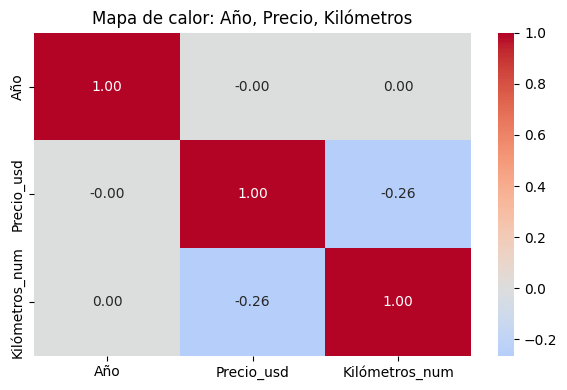

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas que te interesan
cols = ['A√±o', 'Precio_usd', 'Kil√≥metros_num']

# Calcular matriz de correlaciones
correlaciones = df_modelo[cols].corr(numeric_only=True)

# Ordenar por correlaci√≥n con el precio
correlacion_con_precio = correlaciones['Precio_usd'].sort_values(ascending=False)
print("üìä Correlaci√≥n de cada variable con Precio_usd:")
print(correlacion_con_precio)

# Graficar heatmap de correlaciones
plt.figure(figsize=(6, 4))
sns.heatmap(correlaciones, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title("Mapa de calor: A√±o, Precio, Kil√≥metros")
plt.tight_layout()
plt.show()




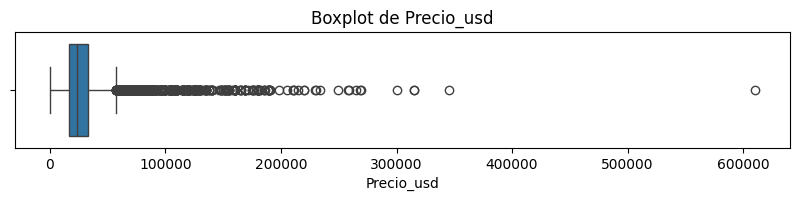

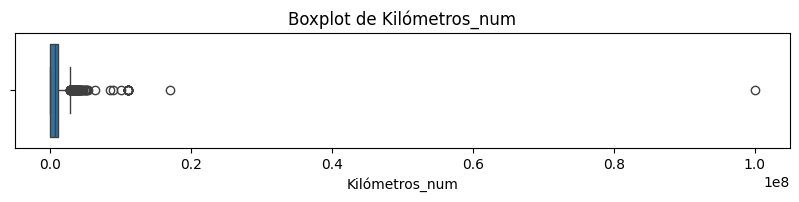

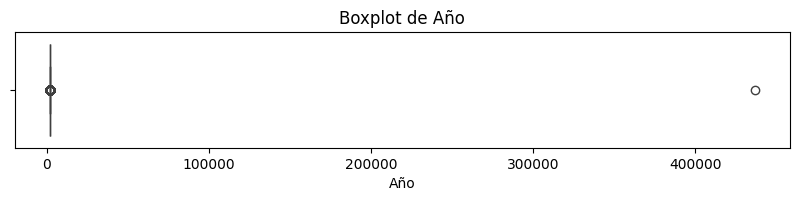

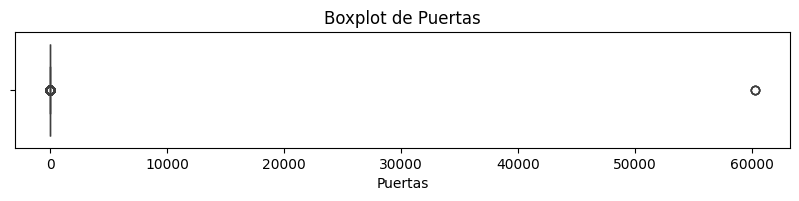

Precio_usd: 935 outliers
Kil√≥metros_num: 209 outliers
A√±o: 260 outliers
Puertas: 523 outliers


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


columnas_numericas = ['Precio_usd', 'Kil√≥metros_num', 'A√±o', 'Puertas']

for col in columnas_numericas:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=df_modelo[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

    
for col in columnas_numericas:
    Q1 = df_modelo[col].quantile(0.25)
    Q3 = df_modelo[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_modelo[(df_modelo[col] < Q1 - 1.5 * IQR) | (df_modelo[col] > Q3 + 1.5 * IQR)]
    cantidad = outliers.shape[0]
    print(f"{col}: {cantidad} outliers")

In [21]:
# Copia de trabajo
df_sin_outliers = df_modelo.copy()

# Lista de columnas num√©ricas
columnas_numericas = ['Kil√≥metros_num', 'A√±o', 'Precio_usd', 'Puertas']  # ajust√° seg√∫n tu dataset

# Eliminar outliers en cada columna num√©rica
for col in columnas_numericas:
    Q1 = df_sin_outliers[col].quantile(0.25)
    Q3 = df_sin_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtramos dentro de los l√≠mites
    df_sin_outliers = df_sin_outliers[
        (df_sin_outliers[col] >= limite_inferior) & (df_sin_outliers[col] <= limite_superior)
    ]

    print(f"{col}: datos fuera de rango eliminados. Filas restantes: {df_sin_outliers.shape[0]}")


Kil√≥metros_num: datos fuera de rango eliminados. Filas restantes: 18045
A√±o: datos fuera de rango eliminados. Filas restantes: 17869
Precio_usd: datos fuera de rango eliminados. Filas restantes: 16943
Puertas: datos fuera de rango eliminados. Filas restantes: 16504


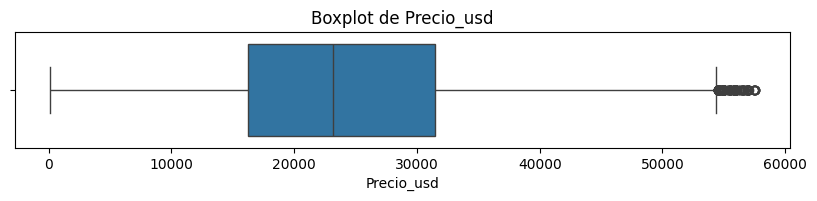

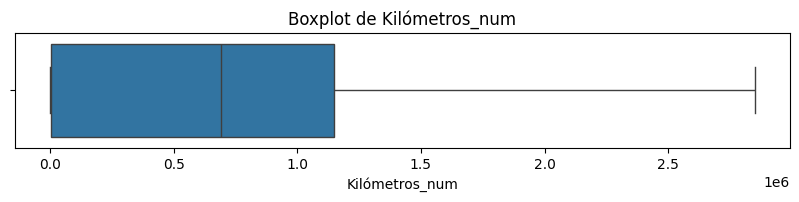

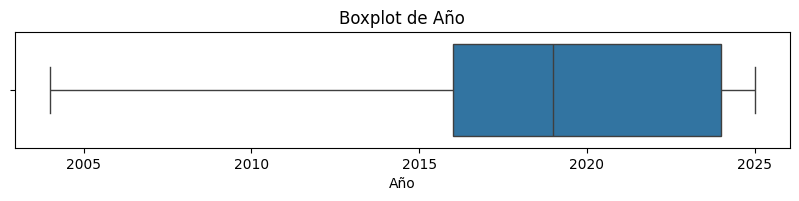

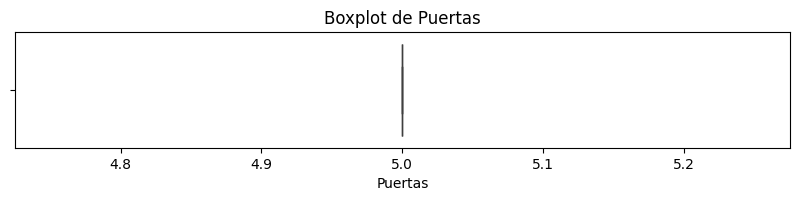

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


columnas_numericas = ['Precio_usd', 'Kil√≥metros_num', 'A√±o', 'Puertas']

for col in columnas_numericas:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=df_sin_outliers[col])
    plt.title(f"Boxplot de {col}")
    plt.show()



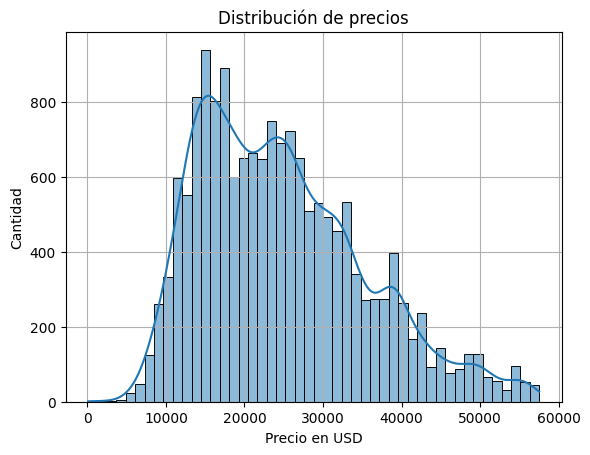

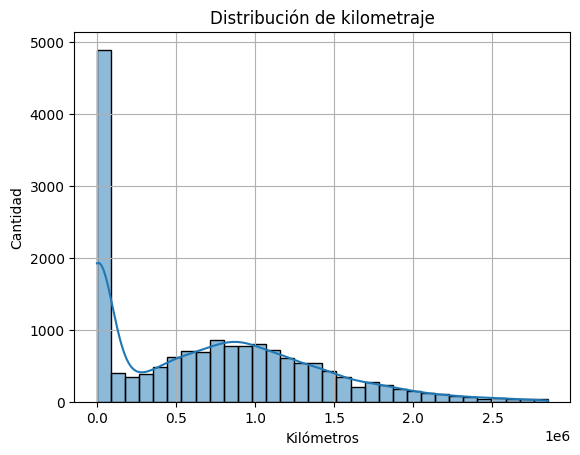

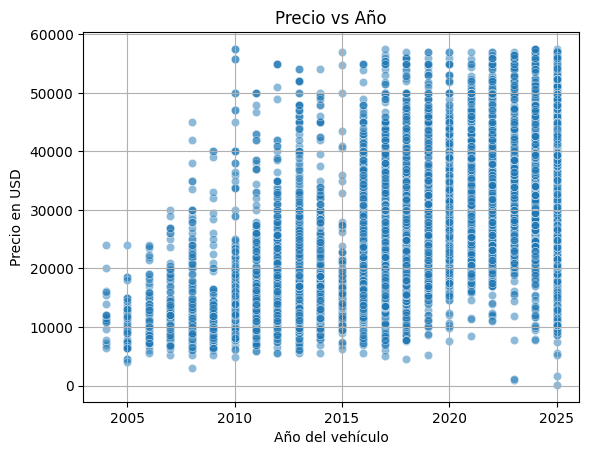

In [23]:
# Histograma de precios
sns.histplot(df_sin_outliers['Precio_usd'], kde=True)
plt.title("Distribuci√≥n de precios")
plt.xlabel("Precio en USD")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()

# Distribuci√≥n de kil√≥metros
sns.histplot(df_sin_outliers['Kil√≥metros_num'], kde=True)
plt.title("Distribuci√≥n de kilometraje")
plt.xlabel("Kil√≥metros")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()

# Relaci√≥n a√±o vs. precio
sns.scatterplot(x='A√±o', y='Precio_usd', data=df_sin_outliers, alpha=0.5)
plt.title("Precio vs A√±o")
plt.xlabel("A√±o del veh√≠culo")
plt.ylabel("Precio en USD")
plt.grid(True)
plt.show()



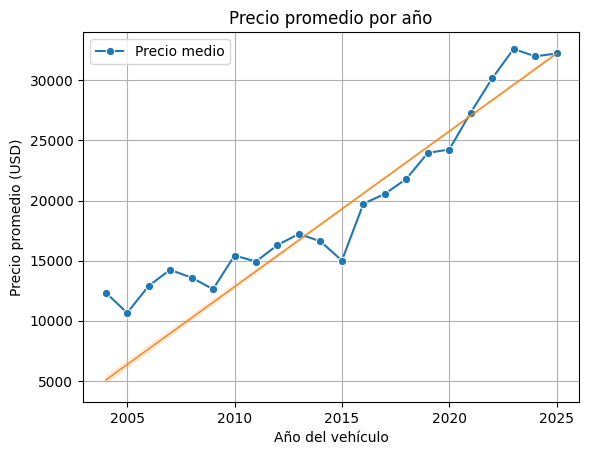

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Precio medio por a√±o
precio_medio = (
    df_sin_outliers
      .groupby('A√±o')['Precio_usd']
      .mean()
      .reset_index()
)

sns.lineplot(data=precio_medio, x='A√±o', y='Precio_usd', marker='o',label='Precio medio')
sns.regplot(
data=df_sin_outliers,
    x='A√±o', y='Precio_usd',
    lowess=False,          # suavizado local
    scatter=False,        # no muestres puntos
    line_kws={'lw': 1},
    label='Tendencia'  # etiqueta para la l√≠nea de regresi√≥n
)
plt.title("Precio promedio por a√±o")
plt.xlabel("A√±o del veh√≠culo")
plt.ylabel("Precio promedio (USD)")
plt.grid(True)
plt.show()


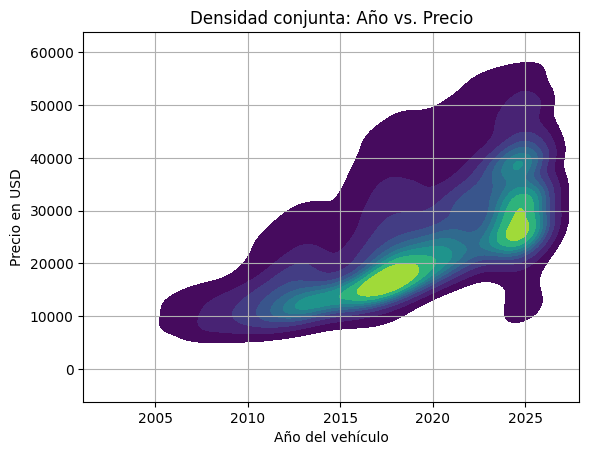

In [25]:
sns.kdeplot(
    data=df_sin_outliers,
    x='A√±o', y='Precio_usd',
    fill=True, cmap='viridis',
    thresh=0.05          # sube o baja para m√°s/menos detalle
)
plt.title("Densidad conjunta: A√±o vs. Precio")
plt.xlabel("A√±o del veh√≠culo")
plt.ylabel("Precio en USD")
plt.grid(True)
plt.show()


C:\Users\andyd\AppData\Local\Temp\ipykernel_12904\140283020.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rango_km')['Precio_usd']


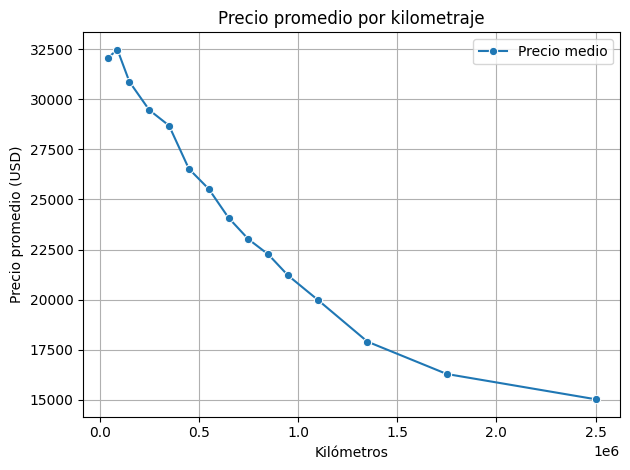

In [26]:

# Crear bins de kilometraje
bins_km = [0, 80000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1200000, 1500000, 2000000, 3000000, 4000000, 5000000]
labels_km = [f'{bins_km[i]}-{bins_km[i+1]}' for i in range(len(bins_km)-1)]

df_sin_outliers['rango_km'] = pd.cut(df_sin_outliers['Kil√≥metros_num'], bins=bins_km, labels=labels_km, include_lowest=True)

precio_vs_km = (
    df_sin_outliers
      .groupby('rango_km')['Precio_usd']
      .mean()
      .reset_index()
)
# Mapear los labels a sus centros
precio_vs_km['km_centro'] = [np.mean([int(b.split('-')[0]), int(b.split('-')[1])]) for b in precio_vs_km['rango_km'].astype(str)]

sns.lineplot(data=precio_vs_km, x='km_centro', y='Precio_usd', marker='o', label='Precio medio')


plt.title("Precio promedio por kilometraje")
plt.xlabel("Kil√≥metros")
plt.ylabel("Precio promedio (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



C:\Users\andyd\AppData\Local\Temp\ipykernel_12904\2503895550.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=precio_marca, x='Marca', y='Precio_usd', palette='viridis')


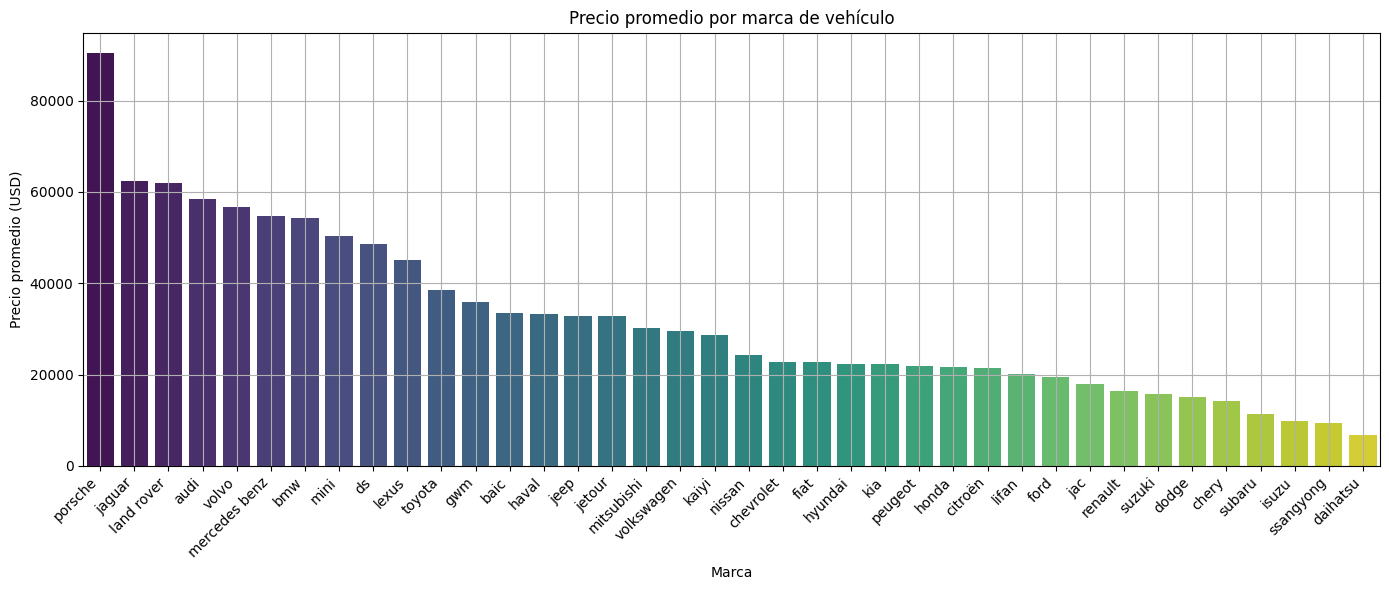

In [27]:
# Detectar columnas que corresponden a marcas (empiezan con "Marca_")
columnas_marca = [col for col in df_modelo.columns if col.startswith('Marca_')]

# Para cada fila, encontrar qu√© columna 'Marca_*' tiene un 1
df_modelo['Marca'] = df_modelo[columnas_marca].idxmax(axis=1).str.replace('Marca_', '', regex=False)

precio_marca = (
    df_modelo
    .groupby('Marca')['Precio_usd']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=precio_marca, x='Marca', y='Precio_usd', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Precio promedio por marca de veh√≠culo')
plt.xlabel('Marca')
plt.ylabel('Precio promedio (USD)')
plt.tight_layout()
plt.grid(True)
plt.show()


In [28]:
#guardar el DataFrame final
df_sin_outliers.to_csv("dataset_basico.csv", index=False)